In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

%matplotlib inline

# from sklearn.preprocessing import LabelEncoder
# from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv('../input/train.csv').drop('id',axis=1)
test = pd.read_csv('../input/test.csv')
test_ids = test['id']
test.drop('id',axis=1,inplace=True)

In [2]:
train.columns

Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type'],
      dtype='object')

In [3]:
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
len(train)

371

In [5]:
len(test)

529

In [6]:
print(train.isnull().any().any())
print(test.isnull().any().any())

False
False


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
gtype = train['type']
train.drop('type',axis=1,inplace=True)
y_train = le.fit_transform(gtype)

In [9]:
le.classes_

array(['Ghost', 'Ghoul', 'Goblin'], dtype=object)

There are 3 categories in the label, each category has 10 observations



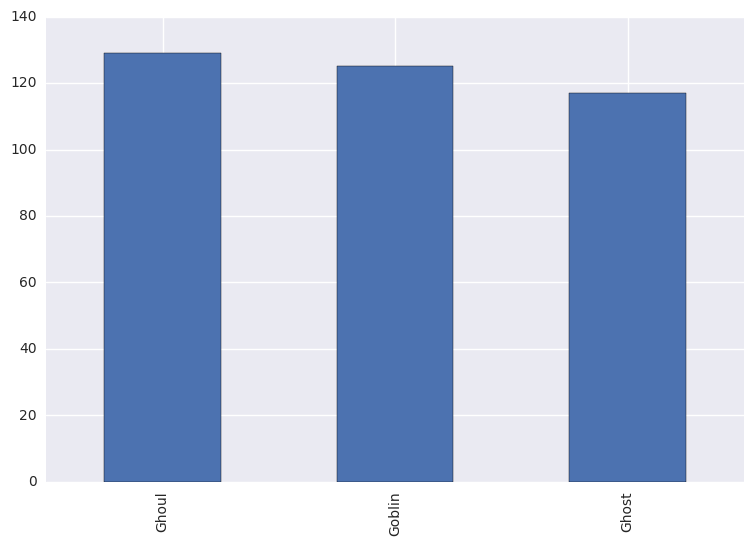

In [10]:
print('There are {} categories in the label, each category has 10 observations\n'.format(len(gtype.unique())))
plt.figure(figsize=(9,6));
gtype.value_counts().plot(kind='bar');

In [11]:
contColumns = train.columns[0:4]
catColumns = ['color']

In [12]:
def setBoxplot(ax,ylim):
    ax.set_ylim(ylim);
    ax.tick_params(axis='y',labelsize=20,);
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=16);

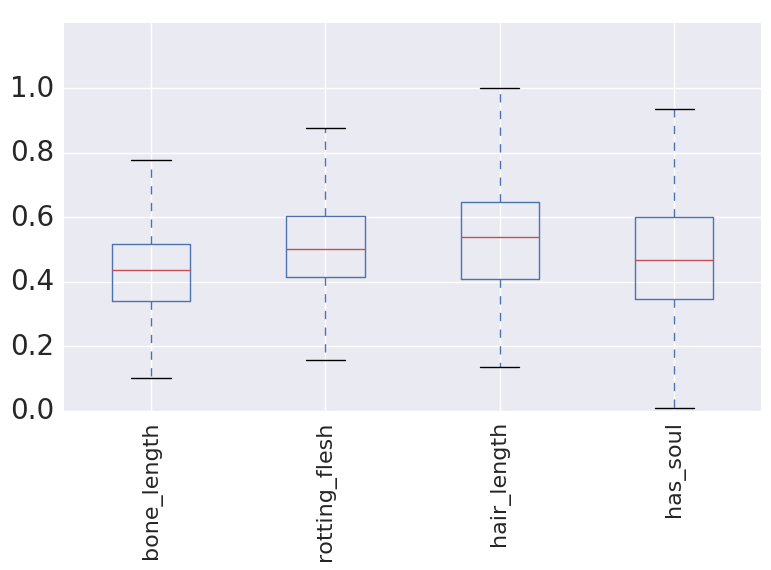

In [13]:
fig = plt.figure(figsize = (9,5));
ax = fig.add_subplot(1,1,1);
train[contColumns].boxplot(whis=1.5);
setBoxplot(ax,[0,1.2])

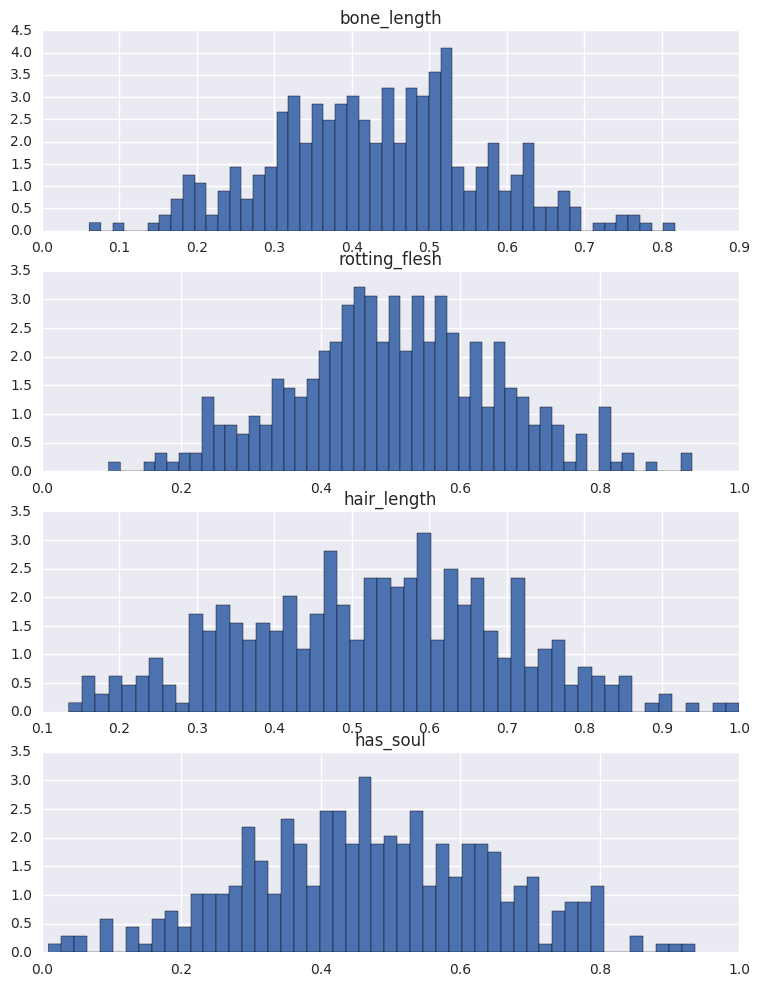

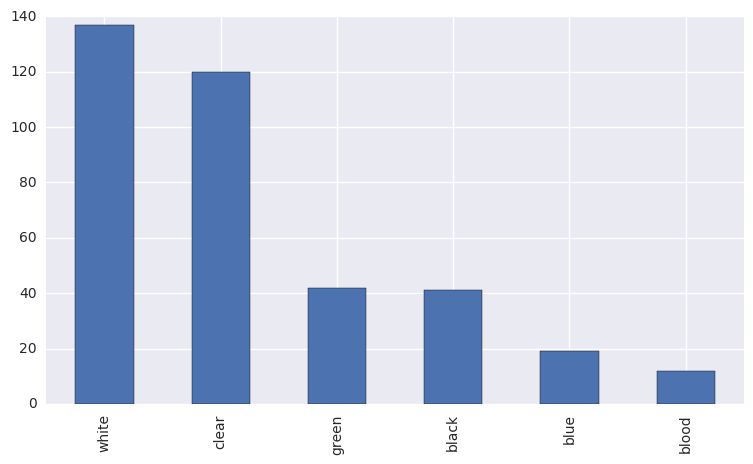

In [14]:
fig=plt.figure(figsize=(9,15))
for i,col in enumerate(train[contColumns]):
    ax = fig.add_subplot(len(train.columns),1,i+1)
    train[col].hist(bins=50,normed=True);
    ax.set_title(col)

fig=plt.figure(figsize=(9,5))
for i,col in enumerate(train[catColumns]):
    train[col].value_counts().plot(kind='bar')

In [15]:
def correlation_matrix(df,ax1):
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    cmap = cm.get_cmap('RdYlBu', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap, vmin=-1.0, vmax=1.0)
    ax1.grid(True)
    labels = df.columns
    ax1.set_xticks(range(0,len(labels)))
    ax1.set_xticklabels(labels,fontsize=12,rotation=90)
    ax1.set_yticks(range(0,len(labels)))
    ax1.set_yticklabels(labels,fontsize=12)
    cbar = fig.colorbar(cax)
    cbar.ax.tick_params(labelsize=16)
    ax1.grid(b=False)

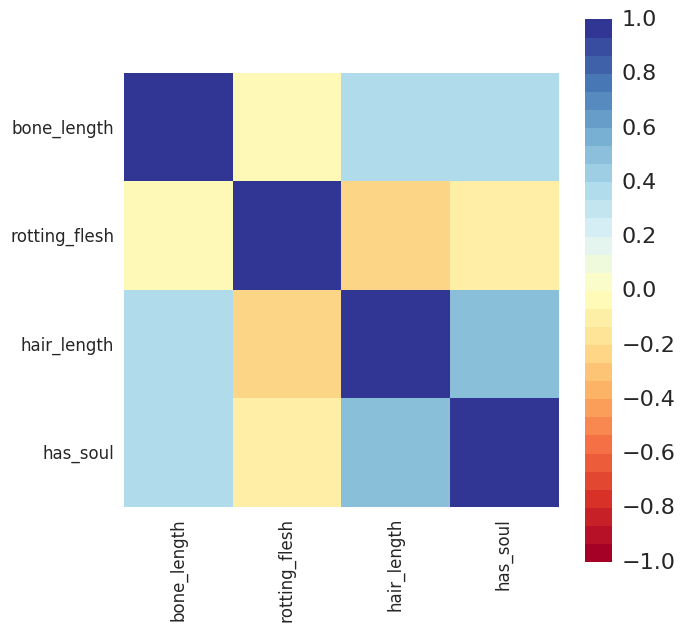

In [16]:
# correlation matrix for margin features
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
correlation_matrix(train[contColumns],ax)

In [17]:
# label encode the categorical features

x_data_df = pd.DataFrame(np.vstack([train,test]),columns = train.columns)
colLes = []
for col in catColumns:
    colLe = LabelEncoder()
    x_data_df[col] = colLe.fit_transform(x_data_df[col])
    colLes.append(colLe)
x_data_df.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
0,0.354512,0.350839,0.465761,0.781142,3
1,0.57556,0.425868,0.531401,0.439899,4
2,0.467875,0.35433,0.811616,0.791225,0
3,0.776652,0.508723,0.636766,0.884464,0
4,0.566117,0.875862,0.418594,0.636438,4


In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x_cat = ohe.fit_transform(x_data_df[catColumns])
n_x_cat = x_cat
print(n_x_cat.shape)
type(n_x_cat)

(900, 6)


scipy.sparse.csr.csr_matrix

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_cont = x_data_df[contColumns].values
n_x_cont = ss.fit_transform(x_cont)
print(n_x_cont.shape)
type(n_x_cont)

(900, 4)


numpy.ndarray

In [20]:
n_x_data = np.hstack([n_x_cont,n_x_cat.toarray()])
print(n_x_data.shape)
n_x_data

(900, 10)


array([[-0.55352147, -1.00416702, -0.33005656, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.08789151, -0.51531896,  0.05406109, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.28826969, -0.98141913,  1.69383282, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.60476305, -0.04308772,  1.08760456, ...,  0.        ,
         0.        ,  1.        ],
       [-0.72460763,  1.69970305, -1.0764836 , ...,  1.        ,
         0.        ,  0.        ],
       [-1.27917377,  1.21735271, -0.62594951, ...,  0.        ,
         0.        ,  1.        ]])

In [21]:
n_x_test = n_x_data[len(gtype):,:]
n_x_train = n_x_data[0:len(gtype),:]

In [22]:
print(n_x_train.shape)
print(y_train.shape)
print(n_x_test.shape)

(371, 10)
(371,)
(529, 10)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
params = {'C':[0.001, 0.01, 1, 10, 100, 500, 1000, 2000], 'tol': [0.0001, 0.001, 0.005]}
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
clf = GridSearchCV(log_reg, params, scoring='log_loss', refit='True', n_jobs=1, cv=5)
clf.fit(n_x_train, y_train)

print("best params: " + str(clf.best_params_))
for params, mean_score, scores in clf.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std(), params))
    print(scores)

best params: {'C': 1, 'tol': 0.0001}
-0.999 (+/-0.007) for {'C': 0.001, 'tol': 0.0001}
[-0.99829045 -1.00248861 -0.99210765 -0.99128737 -1.01138702]
-0.999 (+/-0.007) for {'C': 0.001, 'tol': 0.001}
[-0.99829031 -1.00248861 -0.99210773 -0.99128737 -1.01138702]
-0.999 (+/-0.007) for {'C': 0.001, 'tol': 0.005}
[-0.99829031 -1.00248672 -0.99210773 -0.99128661 -1.01138678]
-0.750 (+/-0.022) for {'C': 0.01, 'tol': 0.0001}
[-0.75473107 -0.75157932 -0.72214937 -0.73439262 -0.78575048]
-0.750 (+/-0.022) for {'C': 0.01, 'tol': 0.001}
[-0.75473107 -0.75157845 -0.72214937 -0.73439231 -0.78575011]
-0.750 (+/-0.022) for {'C': 0.01, 'tol': 0.005}
[-0.7547323  -0.75157845 -0.72215456 -0.73439707 -0.78575011]
-0.567 (+/-0.053) for {'C': 1, 'tol': 0.0001}
[-0.58622634 -0.5331408  -0.4834477  -0.59748166 -0.63644676]
-0.567 (+/-0.053) for {'C': 1, 'tol': 0.001}
[-0.58622575 -0.53314142 -0.48344862 -0.59748272 -0.63645171]
-0.567 (+/-0.053) for {'C': 1, 'tol': 0.005}
[-0.58623308 -0.5331331  -0.48344862 -

In [24]:
y_test_raw = clf.predict_proba(n_x_test)
y_test_raw_df = pd.DataFrame(y_test_raw, index=test_ids, columns=le.classes_)
submission = pd.DataFrame({'id':y_test_raw_df.idxmax(axis=1).index,'type':y_test_raw_df.idxmax(axis=1).values})

submission

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Goblin
4,13,Ghost
5,14,Ghost
6,15,Ghoul
7,16,Goblin
8,17,Goblin
9,18,Ghoul


In [25]:
submission.to_csv('./submission_raw.csv',index=False)